In [113]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualizations
import os


# Basic packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rd # generating random numbers
import datetime # manipulating date formats
# Viz
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots


# TIME SERIES
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs


# settings
import warnings
warnings.filterwarnings("ignore")

In [5]:

raw_data = pd.read_csv("./2019-Oct.csv")

# Get only purchases
only_purchases = raw_data.loc[raw_data.event_type == 'purchase']

In [1005]:
raw_data['event_type'].unique()

array(['cart', 'view', 'remove_from_cart', 'purchase'], dtype=object)

In [ ]:
raw_data.loc[only_purchases['product_id']==5688124]['brand'].unique()

In [6]:
only_purchases.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
201,2019-10-01 00:06:35 UTC,purchase,5619862,1487580006895846315,NaN,runail,0.86,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe
204,2019-10-01 00:06:35 UTC,purchase,5619866,1487580006895846315,NaN,runail,0.46,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe
205,2019-10-01 00:06:35 UTC,purchase,5696184,1487580005134238553,NaN,runail,0.39,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe
206,2019-10-01 00:06:35 UTC,purchase,5706784,1487580005092295511,NaN,runail,0.72,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe
207,2019-10-01 00:06:35 UTC,purchase,5723503,1487580005134238553,NaN,runail,0.42,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe


In [ ]:
#5854897, 5792800

In [928]:
only_purchases.loc[only_purchases['product_id']==5688124]['brand'].unique()

array([nan], dtype=object)

In [18]:
only_purchases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245624 entries, 201 to 4101985
Data columns (total 9 columns):
event_time       245624 non-null object
event_type       245624 non-null object
product_id       245624 non-null int64
category_id      245624 non-null int64
category_code    3201 non-null object
brand            144927 non-null object
price            245624 non-null float64
user_id          245624 non-null int64
user_session     245624 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 28.7+ MB


In [929]:
toplist=only_purchases.groupby(['product_id']).count().sort_values(by='event_time', ascending=False).head(10)
brandlist=['irisk','runail','uno','nan','nan','nan','uno','runail','nan','nan']
toplist['brandname']=brandlist


,event_time,event_type,category_id,category_code,brand,price,user_id,user_session,brandname
product_id,,,,,,,,,
5854897,700,700,700,0,700,700,700,700,irisk
5700037,695,695,695,0,695,695,695,695,runail
5751422,644,644,644,0,644,644,644,644,uno
5802432,640,640,640,0,0,640,640,640,nan
5792800,592,592,592,0,0,592,592,592,nan
5686925,583,583,583,0,0,583,583,583,nan
5751383,566,566,566,0,566,566,566,566,uno
5304,524,524,524,0,524,524,524,524,runail
5815662,498,498,498,0,0,498,498,498,nan


In [525]:
#look at items among the most purchased

#5854897, 5792800
only_purchases.index.name = None
one_item=only_purchases.loc[only_purchases['product_id'] == 5854897].sort_values(by='event_time')
two_item=only_purchases.loc[only_purchases['product_id'] == 5792800].sort_values(by='event_time')

two_item['event_time'].unique()

<DatetimeArray>
['2019-10-01 03:02:57+00:00', '2019-10-01 06:43:56+00:00',
 '2019-10-01 06:56:11+00:00', '2019-10-01 06:58:02+00:00',
 '2019-10-01 07:29:56+00:00', '2019-10-01 07:49:00+00:00',
 '2019-10-01 09:09:59+00:00', '2019-10-01 09:50:13+00:00',
 '2019-10-01 10:01:44+00:00', '2019-10-01 10:22:36+00:00',
 ...
 '2019-10-31 11:26:45+00:00', '2019-10-31 11:47:34+00:00',
 '2019-10-31 13:00:34+00:00', '2019-10-31 13:16:16+00:00',
 '2019-10-31 13:52:31+00:00', '2019-10-31 17:30:25+00:00',
 '2019-10-31 18:39:53+00:00', '2019-10-31 18:49:50+00:00',
 '2019-10-31 19:48:06+00:00', '2019-10-31 21:45:44+00:00']
Length: 592, dtype: datetime64[ns, tzutc()]

In [177]:
one_item['event_time'].unique()

<DatetimeArray>
['2019-10-01 05:02:12+00:00', '2019-10-01 05:10:40+00:00',
 '2019-10-01 05:46:49+00:00', '2019-10-01 06:29:36+00:00',
 '2019-10-01 06:42:34+00:00', '2019-10-01 06:47:29+00:00',
 '2019-10-01 07:24:07+00:00', '2019-10-01 08:33:01+00:00',
 '2019-10-01 09:06:25+00:00', '2019-10-01 10:41:22+00:00',
 ...
 '2019-10-31 11:26:45+00:00', '2019-10-31 11:28:11+00:00',
 '2019-10-31 13:24:29+00:00', '2019-10-31 14:04:15+00:00',
 '2019-10-31 14:27:17+00:00', '2019-10-31 15:19:32+00:00',
 '2019-10-31 15:24:26+00:00', '2019-10-31 18:00:29+00:00',
 '2019-10-31 18:39:53+00:00', '2019-10-31 19:29:09+00:00']
Length: 700, dtype: datetime64[ns, tzutc()]

In [178]:
import datetime
from dateutil import parser

#>>> parser.parse("Tue Jun 22 07:46:22 EST 2010")

In [180]:
only_purchases['event_time']=only_purchases.event_time.apply(lambda x:parser.parse(x))


In [181]:
only_purchases.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245624 entries, 2019-10-01 00:06:35+00:00 to 2019-10-31 23:55:35+00:00
Data columns (total 9 columns):
event_time       245624 non-null datetime64[ns, tzutc()]
event_type       245624 non-null object
product_id       245624 non-null int64
category_id      245624 non-null int64
category_code    3201 non-null object
brand            144927 non-null object
price            245624 non-null float64
user_id          245624 non-null int64
user_session     245624 non-null object
dtypes: datetime64[ns, tzutc()](1), float64(1), int64(3), object(4)
memory usage: 18.7+ MB


In [182]:
only_purchases.set_index(only_purchases["event_time"],inplace=True)


In [526]:
ts=one_item.resample('6h').count()
ts2=two_item.resample('6h').count()
print(len(ts2))
ts2.head()

124


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
2019-10-01 00:00:00+00:00,1,1,1,1,0,0,1,1,1
2019-10-01 06:00:00+00:00,12,12,12,12,0,0,12,12,12
2019-10-01 12:00:00+00:00,8,8,8,8,0,0,8,8,8
2019-10-01 18:00:00+00:00,3,3,3,3,0,0,3,3,3
2019-10-02 00:00:00+00:00,2,2,2,2,0,0,2,2,2


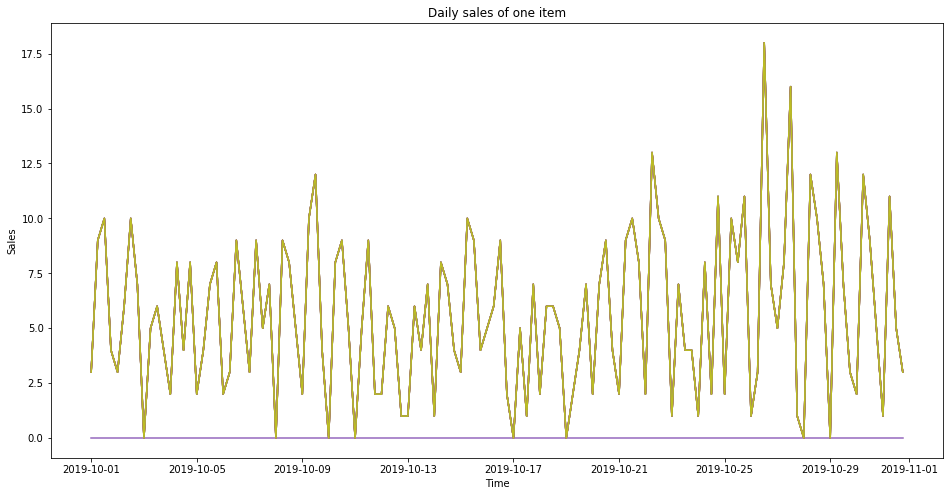

In [273]:

ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('sales of one item per 6h')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts);

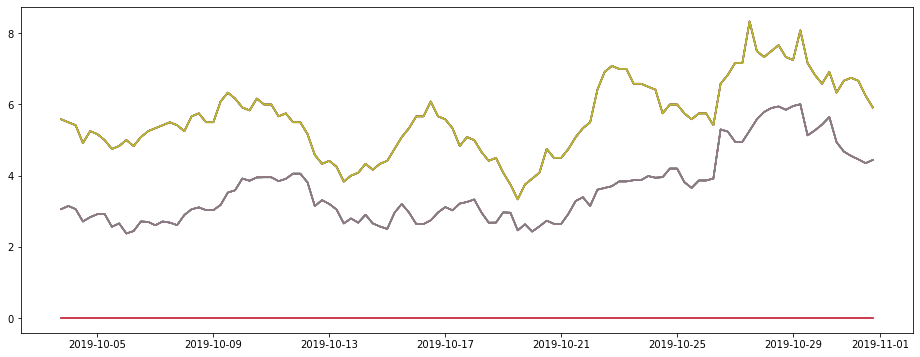

In [274]:
plt.figure(figsize=(16,6))
plt.plot(ts.rolling(window=12,center=False).mean(),label='Rolling Mean');
plt.plot(ts.rolling(window=12,center=False).std(),label='Rolling sd');
#plt.legend();

<Figure size 1152x864 with 0 Axes>

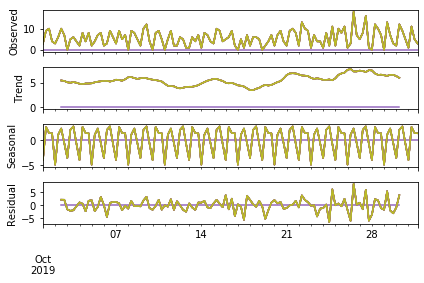

In [275]:
import statsmodels.api as sm
# multiplicative
res = sm.tsa.seasonal_decompose(ts,freq=12,model="additive")
plt.figure(figsize=(16,12))
fig = res.plot()

In [283]:
def test_stationarity(timeseries):
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


test_stationarity(ts.iloc[:,0])
#default does pass dickey fuller but the distribution (see below is not normal. implies need to check one difference down)

Results of Dickey-Fuller Test:
Test Statistic                  -3.806095
p-value                          0.002846
#Lags Used                       5.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


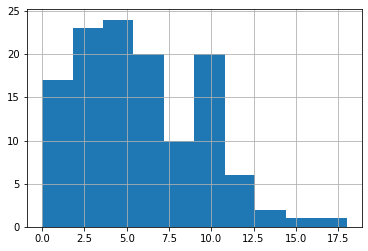

In [284]:
pd.Series(ts.iloc[:,0]).hist();

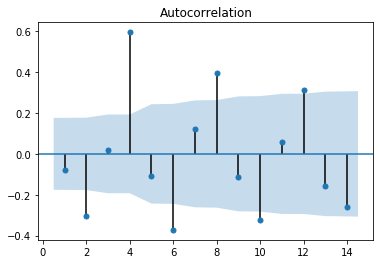

In [292]:
from statsmodels.graphics.tsaplots import plot_acf

fig = plot_acf(ts.iloc[:,0], lags=range(1,15), alpha=0.05)

#autocorr high ever 4 6hr periods,, ie same time every day
#does this imply a seasonality of 4? 

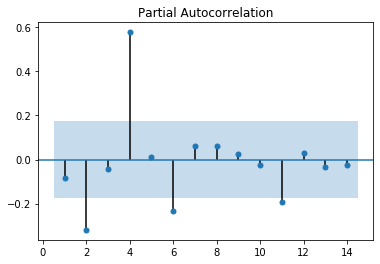

In [294]:
#what if pacf is negative??

from statsmodels.graphics.tsaplots import plot_pacf

fig = plot_pacf(ts.iloc[:,0], lags=range(1,15), alpha=0.05)

In [277]:
# function to remove trend manually, also removes timestamp, didnt use this. 
from pandas import Series as Series
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

# invert differenced forecast
def inverse_difference(last_ob, value):
    return value + last_ob

[]

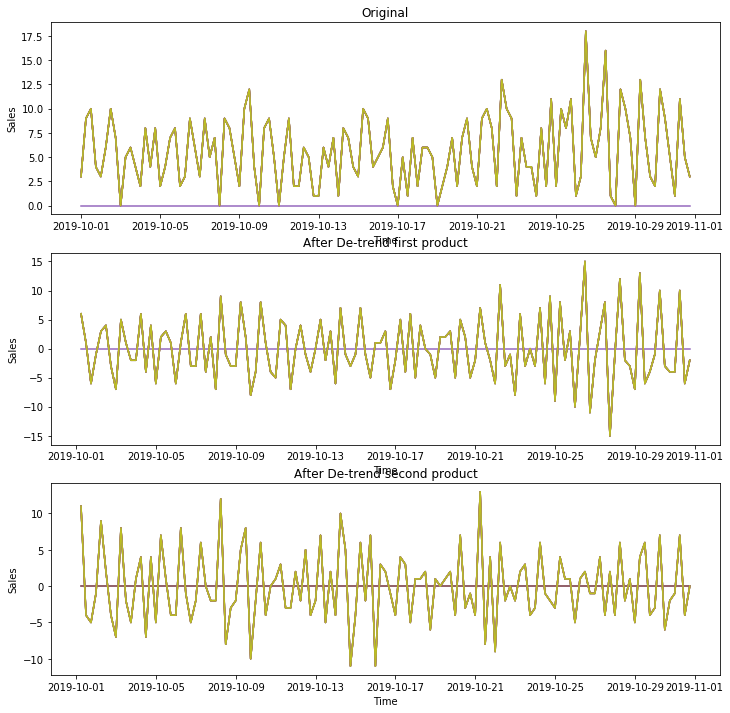

In [723]:

#using .diff(), non-manual, retains dates. 
#ts=sales.groupby(["date_block_num"])["item_cnt_day"].sum()
#
ts.astype('float')
plt.figure(figsize=(12,12))
plt.subplot(311)
plt.title('Original')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts)
plt.subplot(312)
plt.title('After De-trend first product')
plt.xlabel('Time')
plt.ylabel('Sales')
new_ts=ts.diff()

#construct counterpart for 2nd product
new_ts2=ts2.diff()

plt.plot(new_ts)
plt.plot()

plt.subplot(313)
plt.title('After De-trend second product')
plt.xlabel('Time')
plt.ylabel('Sales')
#new_ts=ts.diff(periods=4)      # assuming the seasonality is 1 day, 4x6h long
plt.plot(new_ts2)
plt.plot()

In [528]:
#using .diff(), non-manual
new_ts=new_ts.iloc[4:,0]

#also for second prodcut
new_ts2=new_ts2.iloc[4:,0]
test_stationarity(new_ts)

Results of Dickey-Fuller Test:
Test Statistic                -6.432981e+00
p-value                        1.679471e-08
#Lags Used                     6.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


In [480]:
#result on the de periodtized version
new_ts=new_ts.iloc[4:,0]
test_stationarity(new_ts)

Results of Dickey-Fuller Test:
Test Statistic                  -4.635569
p-value                          0.000111
#Lags Used                      12.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


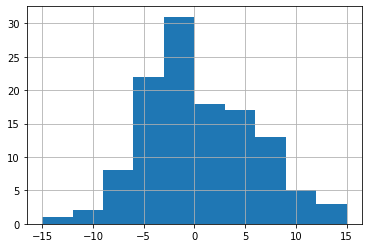

In [530]:
pd.Series(new_ts).hist();
#after one difference looks like
#1 seasonaility removed from graph? 2 normal distribution, 3 pass dickey fuller

In [317]:
def run_sequence_plot(x, y, title, xlabel="time", ylabel="series"):
    plt.plot(x, y, 'k-', label="actual")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3)
    plt.legend();

from statsmodels.tsa.arima_model import ARMA



# MA stuff

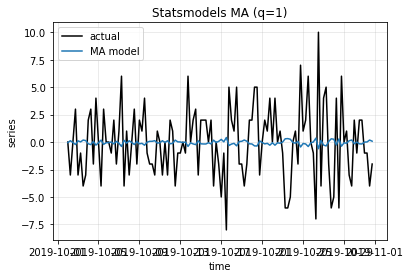

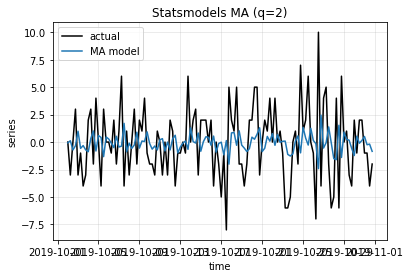

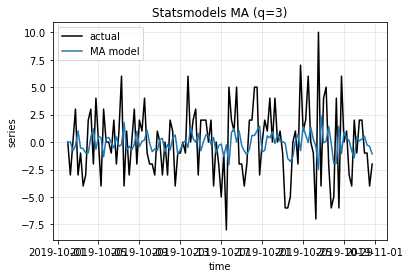

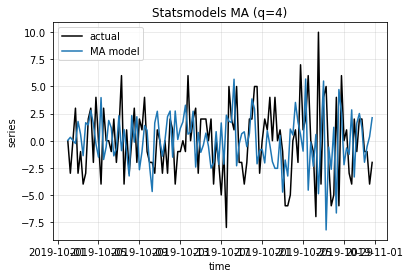

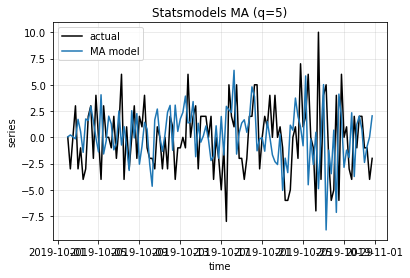

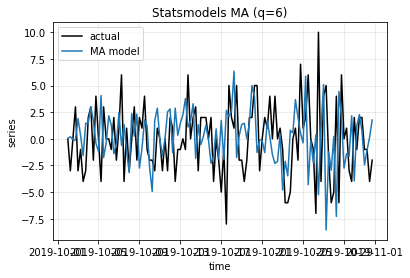

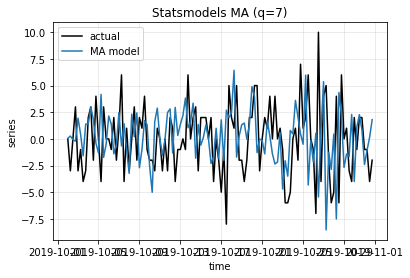

In [318]:
# plot different orders (q's)
for i in range(1,8):
    model = ARMA(new_ts, (0,i)).fit()
    run_sequence_plot(new_ts.index, new_ts, title="Statsmodels MA (q={})".format(i))
    plt.plot(new_ts.index, model.predict(start=1, end=120), label="MA model")
    plt.legend()

    plt.show();

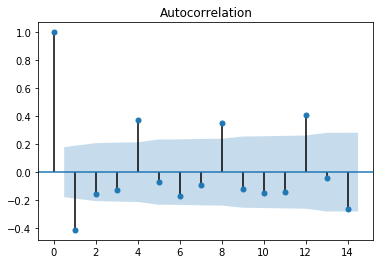

In [537]:
from statsmodels.graphics.tsaplots import plot_acf

fig = plot_acf(new_ts2, lags=range(0,15), alpha=0.05)

#autocorrelation every 4 periods, as expected

# AR stuff

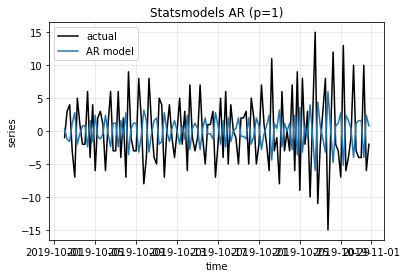

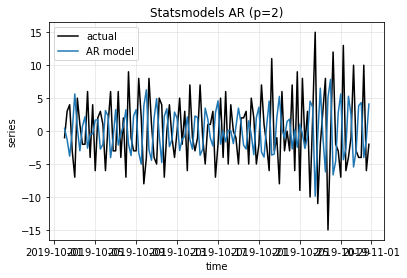

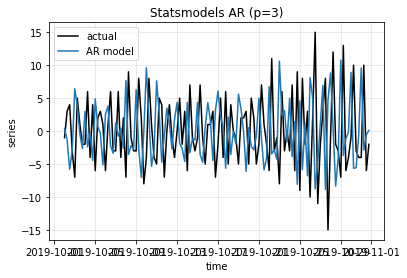

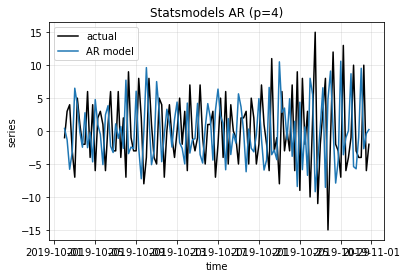

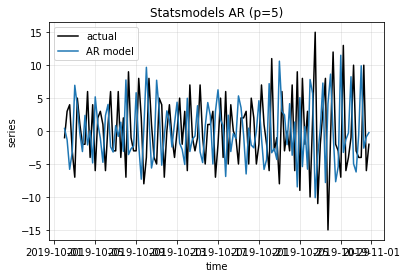

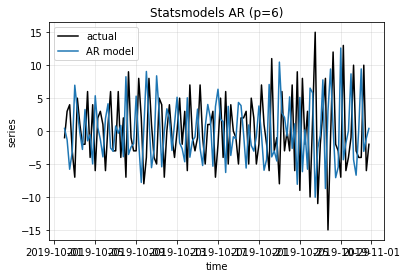

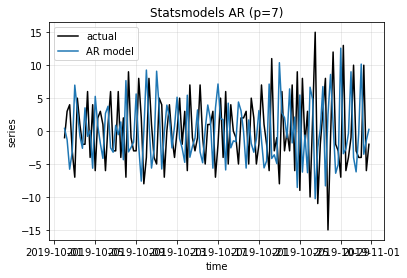

In [538]:
# plot different orders (q's)
for i in range(1,8):
    model = ARMA(new_ts, (i,0)).fit()
    run_sequence_plot(new_ts.index, new_ts, title="Statsmodels AR (p={})".format(i))
    plt.plot(new_ts.index, model.predict(start=1, end=120), label="AR model")
    plt.legend()
    plt.show();

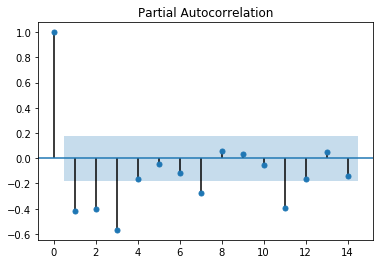

In [539]:
#what if pacf is negative??

from statsmodels.graphics.tsaplots import plot_pacf

fig = plot_pacf(new_ts2, lags=range(0,15), alpha=0.05)

In [531]:
short_new_ts=new_ts[:-30]
short_new_ts.head()


short_new_ts2=new_ts2[:-30]
short_new_ts2.head()
len(short_new_ts2)

90

## gridsearch for parameters to use on first differenced ts

In [815]:
# SETUP (using itertools to gridsearch solutions)
import itertools

#set parameter range; feel free to update these!
p = q = range(0, 3)
d = range(0, 2)
season = 28

# list of all parameter combos
pdq = list(itertools.product(p, d, q))
# same for seasonal variant
seasonal_pdq = [(x[0], x[1], x[2], season) for x in list(itertools.product(p, d, q))]

print('SARIMAX: {} , {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} , {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} , {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} , {}'.format(pdq[2], seasonal_pdq[4]))

test_model=np.log(ts.iloc[:93,0]+1)
#change which time series to find best param for HERE
#short_new_ts
#short_new_ts2
#
#

SARIMAX: (0, 0, 1) , (0, 0, 1, 28)
SARIMAX: (0, 0, 1) , (0, 0, 2, 28)
SARIMAX: (0, 0, 2) , (0, 1, 0, 28)
SARIMAX: (0, 0, 2) , (0, 1, 1, 28)


In [816]:
# APPLY (find optimal SARIMA for period 4

# UNCOMMENT THE FOLLOWING TO RUN (note: this can take awhile)
#ts.iloc[:,0]

warnings.filterwarnings("ignore") # specify to ignore warning messages

sarima_list=[]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(test_model,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            sarima_tuple=(param, param_seasonal, results.aic)
            sarima_list.append(sarima_tuple)
            #print('ARIMA{},{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            
#print best hyperparam via aic score
print('sarima',sorted(sarima_list, key=lambda x: x[2])[0])

#using de-seasonilized short_new_ts
#4, 371.699
#6 ((2, 0, 2), (1, 1, 2, 6), 349.6721928516891)
#7, (0, 0, 2), (1, 1, 2, 7), 345.5012819608194
#8, sarima ((2, 0, 2), (0, 1, 2, 8), 327.4618505232281)

#using detrended only new_ts
#sarima ((0, 0, 2), (0, 1, 2, 4), 356.9611533588587)

#short_new_ts2
#((0, 0, 2), (1, 1, 2, 4), 377.6273547680693)

#sarima ((0, 0, 2), (0, 1, 2, 4), 385.5388995760773)




#sarima ((0, 0, 2), (2, 1, 2, 7), 369.3116897448771)
#sarima ((1, 0, 2), (2, 1, 2, 7), 348.7996211473078)

#sarima ((2, 0, 0), (2, 1, 0, 28), -34.651181236261365) shortnewts
#sarima ((1, 1, 2), (2, 1, 0, 28), -28.124965359537555) shortnewts2

#np.log(ts2.iloc[:93,0]+1
#sarima ((0, 1, 0), (2, 1, 0, 28), 11.931111341975544)
#np.log(ts.iloc[:93,0]+1)

#what number should i use for seasonality? 

sarima ((0, 0, 0), (2, 1, 0, 28), 18.740879582385965)


In [515]:


# APPLY (find optimal ARIMA for annual_

# UNCOMMENT THE FOLLOWING TO RUN (note: this can take awhile)
#ts.iloc[:,0]

warnings.filterwarnings("ignore") # specify to ignore warning messages

arima_list=[]

for param in pdq:
    try:
        mod = sm.tsa.ARIMA(test_model,
                                        order=param,)

        results = mod.fit()
        arima_tuple=(param, results.aic)
        arima_list.append(arima_tuple)
    except:
        continue
        
print('arima',sorted(arima_list, key=lambda x: x[1])[0])

#higher aic than sarima.. go with sarima then. 

arima ((2, 0, 1), 478.70881984026835)


In [676]:
#sort by aic, pick the parameters that give best aic
print('sarima',sorted(sarima_list, key=lambda x: x[2])[0])

sarima ((0, 0, 2), (0, 1, 2, 4), 385.5388995760773)


# model first differnce time series for product 1
short_new_ts

In [762]:
min(data)

-8.0

In [766]:

# specify training data
data = short_new_ts

#sarima ((1, 0, 2), (2, 1, 2, 7), 348.7996211473078)
#sarima ((2, 0, 0), (2, 1, 0, 28), -34.651181236261365)


# define model
model = SARIMAX(data, order=(1, 0, 0), seasonal_order=(1, 1, 0, 28))
# fit model
model_fit = model.fit()
# one step forecast
sarima_yhat = model_fit.forecast(30)

short_new_ts_sarima_pred=short_new_ts.append(sarima_yhat)

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         event_time   No. Observations:                   90
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 28)   Log Likelihood                -163.175
Date:                            Mon, 09 Dec 2019   AIC                            332.350
Time:                                    16:13:35   BIC                            338.732
Sample:                                10-02-2019   HQIC                           334.856
                                     - 10-24-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4756      0.109     -4.375      0.000      -0.689      -0.263
ar.S.L28      -0.6639      0.133     -4.987      0.000      -0.925      -0.403
sigma2         8.6647      2.385      3.634      0.000       3.991      13.338
===================================================================================
Ljung-Box (Q):                       34.19   Jarque-Bera (JB):                 1.07
Prob(Q):                              0.73   Prob(JB):                         0.59
Heteroskedasticity (H):               0.81   Skew:                            -0.02
Prob(H) (two-sided):                  0.63   Kurtosis:                         2.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [555]:
short_new_ts2.head()

2019-10-02 00:00:00+00:00   -1.0
2019-10-02 06:00:00+00:00    9.0
2019-10-02 12:00:00+00:00    2.0
2019-10-02 18:00:00+00:00   -4.0
2019-10-03 00:00:00+00:00   -7.0
Freq: 6H, Name: event_time, dtype: float64

# model first differnce time series for product 2
short_new_ts2

In [ ]:
#sarima ((2, 0, 0), (2, 1, 0, 28), -34.651181236261365) shortnewts
#sarima ((1, 1, 2), (2, 1, 0, 28), -28.124965359537555) shortnewts2

In [749]:

# specify training data
data = short_new_ts2

#sarima ((0, 0, 2), (2, 1, 2, 7), 369.3116897448771)

# define model
model = sm.tsa.statespace.SARIMAX(data, order=(1, 1, 2), seasonal_order=(2, 1, 0, 28))
# fit model
model_fit = model.fit()
# one step forecast
sarima_yhat2 = model_fit.forecast(30)

short_new_ts_sarima_pred2=short_new_ts2.append(sarima_yhat2)



import statsmodels.api as sm

# # fit SARIMA monthly based on helper plots
# sar = sm.tsa.statespace.SARIMAX(np.log(ts.iloc[:,0]+1), 
#                                 order=(0,1,1), 
#                                 seasonal_order=(0,1,1,28), 
#                                 trend='ct').fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         event_time   No. Observations:                   90
Model:             SARIMAX(1, 1, 2)x(2, 1, 0, 28)   Log Likelihood                -166.221
Date:                            Mon, 09 Dec 2019   AIC                            344.443
Time:                                    16:05:06   BIC                            357.108
Sample:                                10-02-2019   HQIC                           349.406
                                     - 10-24-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0521      0.153     -0.342      0.733      -0.351       0.247
ma.L1         -1.9077      0.095    -20.066      0.000      -2.094      -1.721
ma.L2          0.9181      0.092     10.002      0.000       0.738       1.098
ar.S.L28      -0.5396      0.219     -2.460      0.014      -0.970      -0.110
ar.S.L56      -0.7294      0.248     -2.946      0.003      -1.215      -0.244
sigma2         5.7593      4.134      1.393      0.164      -2.343      13.862
===================================================================================
Ljung-Box (Q):                       40.73   Jarque-Bera (JB):                 0.59
Prob(Q):                              0.44   Prob(JB):                         0.75
Heteroskedasticity (H):               1.26   Skew:                            -0.10
Prob(H) (two-sided):                  0.61   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [501]:
sarima_yhat.head()

2019-10-24 12:00:00+00:00   -1.291628
2019-10-24 18:00:00+00:00   -1.663834
2019-10-25 00:00:00+00:00   -3.459806
2019-10-25 06:00:00+00:00    5.681247
2019-10-25 12:00:00+00:00   -0.005796
Freq: 6H, dtype: float64

# attempt to model arima

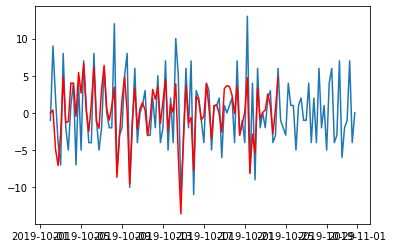

In [540]:
# define model
model = sm.tsa.ARIMA(data, order=(2, 0, 2))
# fit model
model_fit = model.fit()
# one step forecast
arima_yhat = model_fit.forecast(30)[0]


 
# plt.plot(new_ts2)
# plt.plot(model_fit.fittedvalues, color='red')

In [493]:
arima_yhat

array([-3.0456482 , -2.6507377 ,  1.54977434,  1.40454484, -0.8192412 ,
       -0.77611917,  0.4006602 ,  0.39568037, -0.22677551, -0.2335712 ,
        0.09553317,  0.10411282, -0.06981542, -0.07698787,  0.01489144,
        0.0200767 , -0.0284383 , -0.03191565, -0.00630949, -0.00408247,
       -0.01759144, -0.01897392, -0.01185018, -0.01101109, -0.01476602,
       -0.01526668, -0.01328834, -0.01299358, -0.01403543, -0.0142071 ])

In [494]:
short_new_ts_arima_pred=short_new_ts.append(pd.Series(arima_yhat))

In [497]:
len(short_new_ts_arima_pred)

120

# plot product 1 forecast against validation

(array([737333., 737337., 737341., 737345., 737349., 737353., 737357.,
        737361., 737364.]), <a list of 9 Text xticklabel objects>)

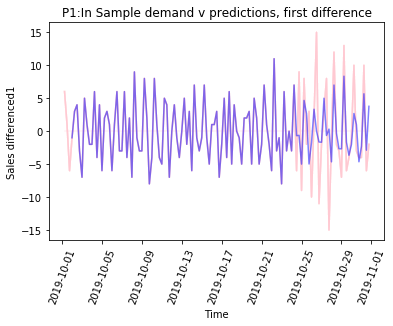

In [997]:
plt.title('P1:In Sample demand v predictions, first difference')
plt.xlabel('Time')
plt.ylabel('Sales differenced1')
plt.plot(new_ts,color='pink', alpha=0.2)
plt.plot(short_new_ts_sarima_pred,color='blue', alpha=0.5)
#plt.plot(short_new_ts_arima_pred,color='green', alpha=0.4)
#plt.plot(short_new_ts_sarima_pred2,color='green', alpha=0.4)
plt.xticks(rotation=70)

# plot product 1 forecast against product 2 forecast

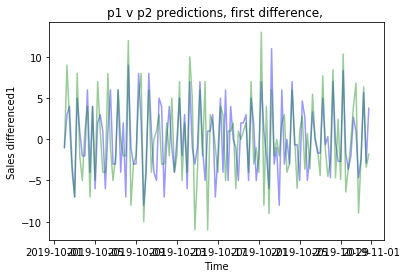

In [783]:
plt.title('p1 v p2 predictions, first difference, ')
plt.xlabel('Time')
plt.ylabel('Sales differenced1')
#plt.plot(new_ts,color='red', alpha=0.4)
plt.plot(short_new_ts_sarima_pred,color='blue', alpha=0.4)
#plt.plot(short_new_ts_arima_pred,color='green', alpha=0.4)
plt.plot(short_new_ts_sarima_pred2,color='green', alpha=0.4)
plt.xticks(rotation=70)

# plot product 2 forecast against validation

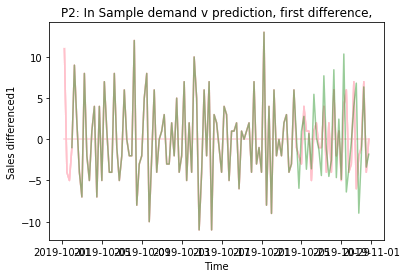

In [751]:
plt.title('P2: In Sample demand v prediction, first difference,')
plt.xlabel('Time')
plt.ylabel('Sales differenced1')
plt.plot(new_ts2,color='pink', alpha=0.4)
#plt.plot(short_new_ts_sarima_pred,color='blue', alpha=0.4)
#plt.plot(short_new_ts_arima_pred,color='green', alpha=0.4)
plt.plot(short_new_ts_sarima_pred2,color='green', alpha=0.4)
plt.xticks(rotation=70)


## Kevin running sarima parameters manually on un-differenced, log'ed dataset
need to split

# product 1

In [800]:
import statsmodels.api as sm

# fit SARIMA monthly based on helper plots
sar = sm.tsa.statespace.SARIMAX(np.log(ts.iloc[:93,0]+1), 
                                order=(0,1,1), 
                                seasonal_order=(0,1,0,28), 
                                ).fit()
sar.summary()
#kevin
#adjust to split 93, 31...

#(0, 0, 2), (0, 1, 2, 4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         event_time   No. Observations:                   93
Model:             SARIMAX(0, 1, 1)x(0, 1, 0, 28)   Log Likelihood                 -64.208
Date:                            Mon, 09 Dec 2019   AIC                            132.416
Time:                                    16:48:16   BIC                            136.733
Sample:                                10-01-2019   HQIC                           134.117
                                     - 10-24-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9720      0.087    -11.142      0.000      -1.143      -0.801
sigma2         0.4163      0.085      4.914      0.000       0.250       0.582
===================================================================================
Ljung-Box (Q):                       54.69   Jarque-Bera (JB):                 1.08
Prob(Q):                              0.06   Prob(JB):                         0.58
Heteroskedasticity (H):               1.05   Skew:                            -0.31
Prob(H) (two-sided):                  0.90   Kurtosis:                         3.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [829]:
#de log, subtract, append to training portion :93
sar_yhat = (np.exp(sar.forecast(93)))-1
plot_sar_yhat=ts.iloc[:93,0].append(sar_yhat)

(array([737333., 737340., 737347., 737354., 737364., 737371., 737378.]),
 <a list of 7 Text xticklabel objects>)

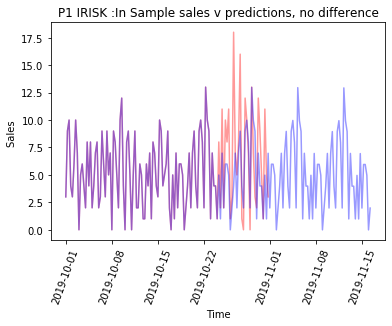

In [998]:
plt.title('P1 IRISK :In Sample sales v predictions, no difference')
plt.xlabel('Time')
plt.ylabel('Sales ')
plt.plot(ts.iloc[:,0],color='red', alpha=0.4)
plt.plot(plot_sar_yhat,color='blue', alpha=0.4)
plt.xticks(rotation=70)

In [777]:
len(ts.iloc[:93,0])

93

# product 2

In [812]:
import statsmodels.api as sm

#sarima ((0, 1, 0), (2, 1, 0, 28), 11.931111341975544)

# fit SARIMA monthly based on helper plots
sar2 = sm.tsa.statespace.SARIMAX(np.log(ts2.iloc[:93,0]+1), 
                                order=(0,1,1), 
                                seasonal_order=(2,1,0,28), 
                                ).fit()
sar2.summary()
#kevin
#adjust to split 93, 31...

#(0, 0, 2), (0, 1, 2, 4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         event_time   No. Observations:                   93
Model:             SARIMAX(0, 1, 1)x(2, 1, 0, 28)   Log Likelihood                 -50.518
Date:                            Mon, 09 Dec 2019   AIC                            109.036
Time:                                    16:58:03   BIC                            117.672
Sample:                                10-01-2019   HQIC                           112.438
                                     - 10-24-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9248      0.085    -10.861      0.000      -1.092      -0.758
ar.S.L28      -0.4598      0.254     -1.812      0.070      -0.957       0.037
ar.S.L56      -0.7825      0.162     -4.833      0.000      -1.100      -0.465
sigma2         0.1167      0.074      1.571      0.116      -0.029       0.262
===================================================================================
Ljung-Box (Q):                       54.43   Jarque-Bera (JB):                 4.32
Prob(Q):                              0.06   Prob(JB):                         0.12
Heteroskedasticity (H):               0.69   Skew:                             0.63
Prob(H) (two-sided):                  0.40   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [831]:
#de log, subtract, append to training portion :93
sar_yhat2 = (np.exp(sar2.forecast(93)))-1
plot_sar_yhat2=ts2.iloc[:93,0].append(sar_yhat2)

(array([737333., 737340., 737347., 737354., 737364., 737371., 737378.]),
 <a list of 7 Text xticklabel objects>)

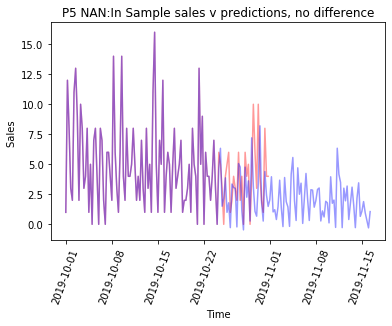

In [999]:
plt.title('P5 NAN:In Sample sales v predictions, no difference')
plt.xlabel('Time')
plt.ylabel('Sales ')
plt.plot(ts2.iloc[:,0],color='red', alpha=0.4)
plt.plot(plot_sar_yhat2,color='blue', alpha=0.4)
plt.xticks(rotation=70)

In [798]:
#helper function giving plots
import statsmodels.tsa.api as smt

def plots(data, lags=None):
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    data.plot(ax=raw)
    smt.graphics.plot_acf(data, lags=lags, ax=acf)
    smt.graphics.plot_pacf(data, lags=lags, ax=pacf)
    sns.despine()
    plt.tight_layout()

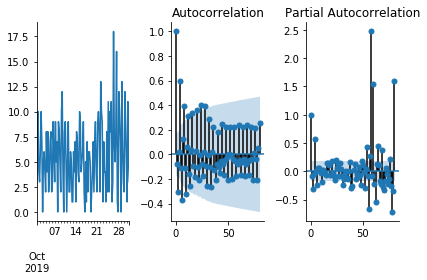

In [799]:
plots(ts.iloc[:,0], lags=80)

# functionizing

2019-10-01 00:00:00+00:00     4
2019-10-01 06:00:00+00:00    10
2019-10-01 12:00:00+00:00    11
2019-10-01 18:00:00+00:00     5
2019-10-02 00:00:00+00:00     4
Freq: 6H, Name: event_time, dtype: int64

In [976]:
#accepts the table only as ts, not conventional series (ts.iloc[:93,0]). 
def paramsearch(ts, season,  ):
    #set parameter range; feel free to update these!
    p = q = range(0, 3)
    d = range(0, 2)
    season = season

    # list of all parameter combos
    pdq = list(itertools.product(p, d, q))
    # same for seasonal variant
    seasonal_pdq = [(x[0], x[1], x[2], season) for x in list(itertools.product(p, d, q))]
    len(ts)
    three_quarter_point=int(len(ts)*.75)
    test_model=np.log(ts.iloc[:three_quarter_point,0]+1)

    #change which time series to find best param for HERE

    warnings.filterwarnings("ignore") # specify to ignore warning messages

    sarima_list=[]

    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(test_model,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                sarima_tuple=(param, param_seasonal, results.aic)
                sarima_list.append(sarima_tuple)
                #print('ARIMA{},{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
                
    #save order and seasonal order in a list and return it
    order=sorted(sarima_list, key=lambda x: x[2])[0][0]
    seasonal_order=sorted(sarima_list, key=lambda x: x[2])[0][1]
    container=[]
    container.append(order)
    container.append(seasonal_order)
    return(container)

    #print best hyperparam via aic score
        


93

In [995]:
def salesforecast(ts,order,seasonal_order):
    three_quarter_point=int(len(ts)*.75)
    sar = sm.tsa.statespace.SARIMAX(np.log(ts.iloc[:three_quarter_point,0]+1), 
                                    order=order, 
                                    seasonal_order=seasonal_order, 
                                    ).fit()
    

    #de log, subtract, append to training portion :93
    sar_yhat = (np.exp(sar.forecast(three_quarter_point)))-1
    plot_sar_yhat=ts.iloc[:three_quarter_point,0].append(sar_yhat)
    plt.title('P1:In Sample sales v predictions, no difference')
    plt.xlabel('Time')
    plt.ylabel('Sales')
    plt.plot(ts.iloc[:,0],color='red', alpha=0.4)
    plt.plot(plot_sar_yhat,color='blue', alpha=0.4)
    plt.xticks(rotation=70)
    
    return sar.summary()

In [ ]:
#START

In [933]:
#code to pull by product id and 

new_item=only_purchases.loc[only_purchases['product_id'] == 5751422].sort_values(by='event_time')
tsx=new_item.resample('6h').count()
gridparam=paramsearch(tsx, 28)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         event_time   No. Observations:                   93
Model:             SARIMAX(2, 0, 0)x(2, 1, 0, 28)   Log Likelihood                 -44.419
Date:                            Mon, 09 Dec 2019   AIC                             98.839
Time:                                    19:53:19   BIC                            109.711
Sample:                                10-01-2019   HQIC                           103.128
                                     - 10-24-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0063      0.153      0.041      0.967      -0.293       0.305
ar.L2         -0.1270      0.154     -0.824      0.410      -0.429       0.175
ar.S.L28      -0.3875      0.340     -1.141      0.254      -1.053       0.278
ar.S.L56      -0.0084      0.743     -0.011      0.991      -1.465       1.448
sigma2         0.2143      0.045      4.717      0.000       0.125       0.303
===================================================================================
Ljung-Box (Q):                       29.18   Jarque-Bera (JB):                 0.10
Prob(Q):                              0.90   Prob(JB):                         0.95
Heteroskedasticity (H):               0.95   Skew:                            -0.08
Prob(H) (two-sided):                  0.91   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

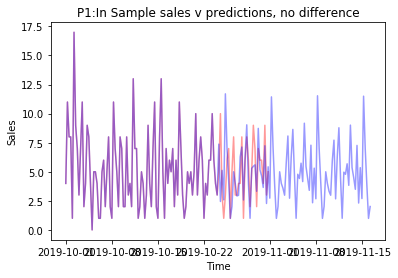

In [935]:
salesforecast(tsx,gridparam[0],gridparam[1])

In [936]:
gridparam

[(2, 0, 0), (2, 1, 0, 28)]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Statespace Model Results                            
================================================================================
Dep. Variable:               event_time   No. Observations:                   93
Model:             SARIMAX(1, 1, 0, 28)   Log Likelihood                 -44.934
Date:                  Mon, 09 Dec 2019   AIC                             93.868
Time:                          20:02:04   BIC                             98.217
Sample:                      10-01-2019   HQIC                            95.584
                           - 10-24-2019                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L28      -0.3898      0.156     -2.492      0.013      -0.696      -0.083
sigma2         0.2173      0.043      5.021      0.000       0.133       0.302
===================================================================================
Ljung-Box (Q):                       27.30   Jarque-Bera (JB):                 0.02
Prob(Q):                              0.94   Prob(JB):                         0.99
Heteroskedasticity (H):               1.11   Skew:                             0.02
Prob(H) (two-sided):                  0.80   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

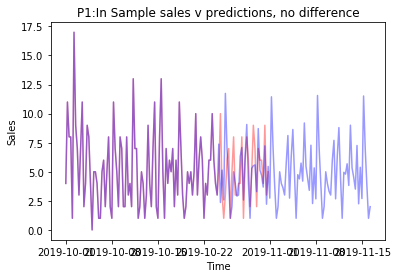

In [961]:
salesforecast(tsx,(0,0,0),(1,1,0,28))

In [932]:
toplist.head()

,event_time,event_type,category_id,category_code,brand,price,user_id,user_session,brandname
product_id,,,,,,,,,
5854897,700,700,700,0,700,700,700,700,irisk
5700037,695,695,695,0,695,695,695,695,runail
5751422,644,644,644,0,644,644,644,644,uno
5802432,640,640,640,0,0,640,640,640,nan
5792800,592,592,592,0,0,592,592,592,nan


In [978]:
#experiment with day freq
new_item=only_purchases.loc[only_purchases['product_id'] == 5751422].sort_values(by='event_time')
tsx=new_item.resample('D').count()
gridparam=paramsearch(tsx, 7)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                        event_time   No. Observations:                   23
Model:             SARIMAX(0, 0, 1)x(2, 1, 0, 7)   Log Likelihood                  -2.472
Date:                           Mon, 09 Dec 2019   AIC                             12.945
Time:                                   20:38:48   BIC                             16.035
Sample:                               10-01-2019   HQIC                            13.103
                                    - 10-23-2019                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0360      0.294      0.122      0.903      -0.540       0.612
ar.S.L7       -0.1543      0.692     -0.223      0.824      -1.511       1.202
ar.S.L14      -0.0910      0.399     -0.228      0.820      -0.874       0.692
sigma2         0.0785      0.034      2.280      0.023       0.011       0.146
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 1.17
Prob(Q):                               nan   Prob(JB):                         0.56
Heteroskedasticity (H):               1.30   Skew:                            -0.62
Prob(H) (two-sided):                  0.78   Kurtosis:                         2.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

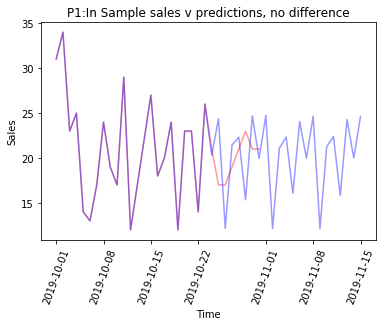

In [1004]:
salesforecast(tsx,gridparam[0],gridparam[1])


In [980]:
gridparam

[(0, 0, 1), (2, 1, 0, 7)]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Statespace Model Results                           
===============================================================================
Dep. Variable:              event_time   No. Observations:                   23
Model:             SARIMAX(0, 1, 0, 7)   Log Likelihood                  -2.567
Date:                 Mon, 09 Dec 2019   AIC                              7.133
Time:                         20:32:33   BIC                              7.906
Sample:                     10-01-2019   HQIC                             7.173
                          - 10-23-2019                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0807      0.030      2.691      0.007       0.022       0.139
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 1.34
Prob(Q):                               nan   Prob(JB):                         0.51
Heteroskedasticity (H):               1.20   Skew:                            -0.66
Prob(H) (two-sided):                  0.85   Kurtosis:                         2.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

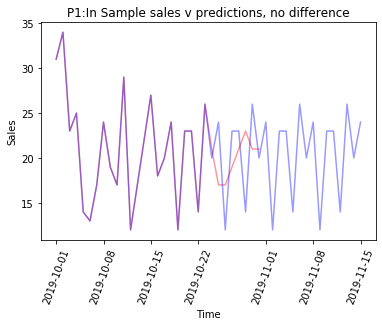

In [996]:
salesforecast(tsx,(0,0,0),(0,1,0,7))